<a href="https://colab.research.google.com/github/i-malur/DataScience_testando_relacoes_com_regressao_linear/blob/main/DataScience_testando_relacoes_com_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


campos de análise

* area_primeiro_andar: Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.
* existe_segundo_andar: Esta variável é binária, indicando se a propriedade possui ou não um segundo andar. Pode ser representada como 1 para "sim" e 0 para "não".
* area_segundo_andar: Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.
* quantidade_banheiros: Indica o número total de banheiros na propriedade.
* capacidade_carros_garagem: Esta variável indica a capacidade da garagem da propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.
* qualidade_da_cozinha_Excelente: Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade. Neste caso, assume-se que se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.
* preco_de_venda: Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.

# 1. Ajustando uma reta

## Conhecendo os dados

In [ ]:
import pandas as pd

In [ ]:
#Lendo dados
dados = pd.read_csv('/content/Preços_de_casas.csv')

In [ ]:
#Quais fatores coletados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
dados = dados.drop(columns = 'Id')

## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.



In [ ]:
# Correlação
corr = dados.corr()

In [ ]:
corr['preco_de_venda']

Id                               -0.024351
area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

1. Correlação: É uma métrica que mede o grau de relacionamento linear entre duas variáveis. Ela varia entre -1 e 1, indicando a direção (positiva ou negativa) e a intensidade da relação.

2. Calculando a correlação: No Google Colab, podemos calcular a correlação entre as variáveis usando o método .corr() aplicado ao DataFrame.

3. Interpretando a correlação:
* Intensidade: Quanto maior o valor absoluto da correlação (mais próximo de 1 ou -1), mais forte é a relação linear entre as variáveis.
* Direção: O sinal positivo ou negativo indica se a relação é direta (quando uma variável aumenta, a outra também aumenta) ou inversa (quando uma variável aumenta, a outra diminui).

4. Formulando hipóteses: Antes de analisar os valores de correlação, é importante formular hipóteses sobre como as variáveis podem estar relacionadas ao preço de venda.

5. Exemplos de correlação:
* Área do primeiro andar: Correlação de 0.62 com o preço de venda, indicando uma relação moderadamente forte e positiva.
* Área do segundo andar: Correlação de 0.30 com o preço de venda, indicando uma relação mais fraca.

6. Próximos passos: Após identificar as variáveis com maior correlação, a próxima etapa é visualizar essa relação de forma gráfica para entender melhor a natureza da correlação.

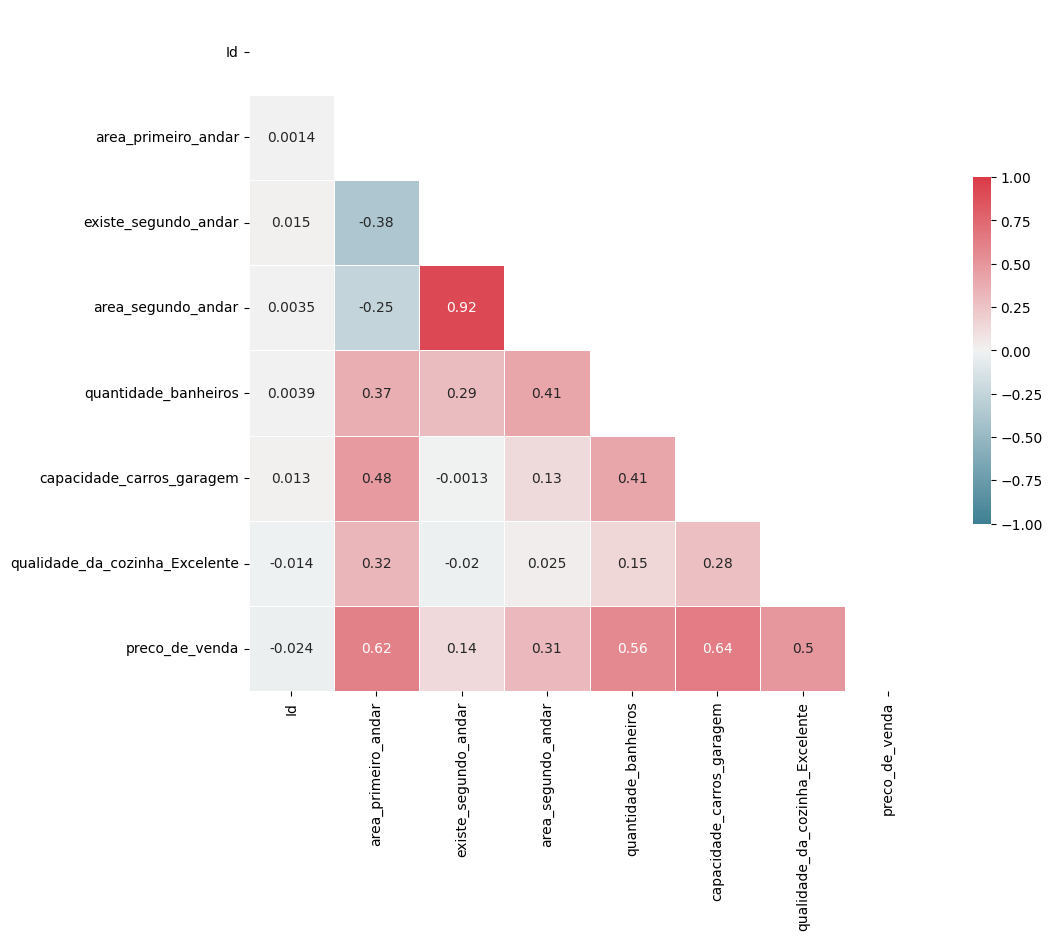

In [ ]:
# Atividade
# Quais fatores estão mais correlacionados?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()



* Intensidade: refere-se à força da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.
* Direção: refere-se à natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice-versa.

Exemplo:
O coeficiente de correlação linear entre a área do primeiro andar e o preço de venda é de 0.62, indicando uma correlação positiva moderadamente forte (intensidade). Em geral, à medida que a área do primeiro andar de uma casa aumenta, o preço de venda também tende a aumentar (direção).  


* A correlação entre a capacidade de carros na garagem e a área do primeiro andar é 0.48 moderadamente positiva, indicando que, em geral, à medida que a capacidade de carros na garagem aumenta, a área do primeiro andar da casa tende a aumentar também.
* Entre garagem para carros e quantidade de banheiros é moderadamente positiva (0.409281), indicando que, em geral, à medida que a capacidade da garagem aumenta, o número de banheiros também tende a aumentar. Isso sugere uma possível associação entre o espaço para estacionamento de veículos e o tamanho da residência.
* Quando olhamos para a correlação entre a área do primeiro andar e a área do segundo andar, verificamos que é fraca e negativa (-0.25). Isso sugere que, em geral, quando a área do primeiro andar de uma casa aumenta, a área do segundo andar tende a diminuir um pouco, e vice-versa. Essa relação indica uma possível compensação entre as áreas dos dois andares, mas não é uma relação muito forte e pode variar entre diferentes propriedades.  
Observação: É importante notar que a correlação não implica causalidade; ou seja, não podemos afirmar que o aumento no preço de venda é causado especificamente pelo aumento na área do primeiro andar apenas com o uso da correlação, mas sim que esses fatores estão relacionados entre si.

## Relacionando variáveis

In [ ]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

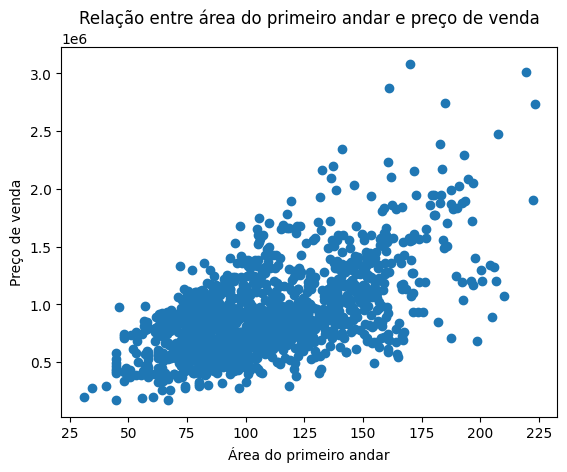

In [ ]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title('Relação entre área do primeiro andar e preço de venda')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')
plt.show()

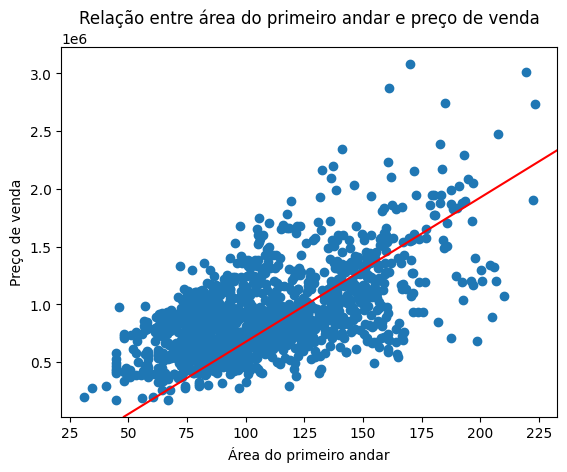

In [ ]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66,250000),xy2=(190,1800000), color='red')
plt.title('Relação entre área do primeiro andar e preço de venda')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço de venda')
plt.show()

## Melhor reta

In [ ]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x='area_primeiro_andar', y='preco_de_venda', trendline_color_override="red", trendline = 'ols')

Conhecendo a fórmula de ajuste da reta
Para ajustar a reta, elencamos uma variável explicativa (X), que no nosso caso, é a área do primeiro andar (area_primeiro_andar).

Depois, trouxemos uma variável resposta (Y), ou seja, o preço de venda (preco_de_venda). Portanto, a área do primeiro andar explica o preço de venda.

Com base nisso, trouxemos o scatter plot (gráfico de dispersão) para visualizar os pontos na representação linear. Essa representação linear é melhor vista com uma reta, então trouxemos esse elemento. Para obter a melhor reta, existe uma fórmula generalizada:

Yᵢ = B₀ + B₁ * Xᵢ

# 2. Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

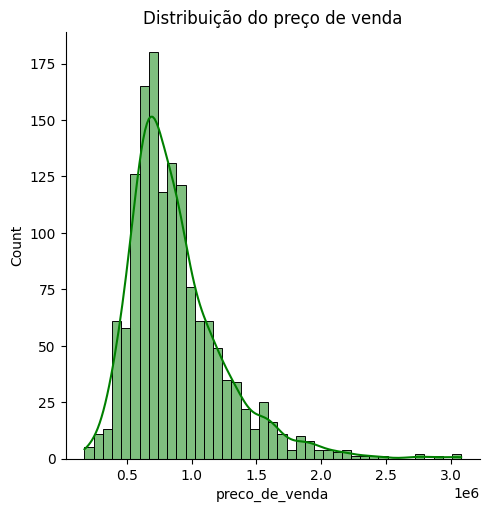

In [ ]:
#Quem é nossa variável resposta?

sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Definindo y e X
Y = dados['preco_de_venda']
X = dados.drop(columns = 'preco_de_venda')

In [ ]:
#Aplicando o split do y e X
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 230)

In [ ]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train)
df_train['preco_de_venda'] = Y_train

In [ ]:
# import ols
from statsmodels.formula.api import ols


In [ ]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()


## Analisando os coeficientes

(intensidade, direção e significância)




In [ ]:
# visualizando os parametros
modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

In [ ]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.22e-105
Time:                        12:34:40   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [ ]:
# observando o R²
modelo_0.rsquared

0.37728010994297867

## Entendendo o resíduo

In [ ]:
# Quem são os residuos
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

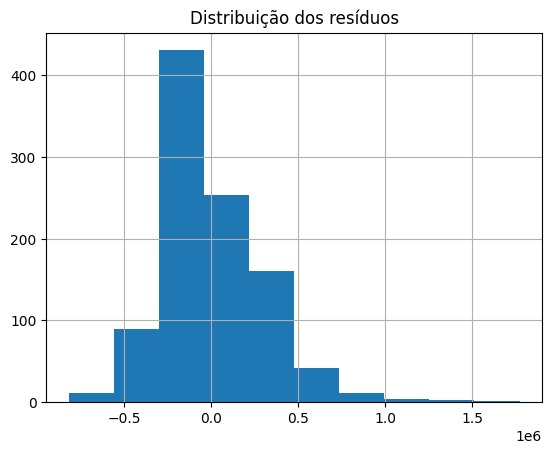

In [ ]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title('Distribuição dos resíduos')
plt.show()


![](https://i.imgur.com/CJMdXpf.png)

## Obtendo o R² da previsão

In [ ]:
# definindo o Y previsto
Y_predict = modelo_0.predict(X_test)

In [ ]:
# importando o r2_score
from sklearn.metrics import r2_score

In [ ]:
# printando o r²
print("R²: ", r2_score(Y_test,Y_predict))

R²:  0.38530928723202407


# 3. Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

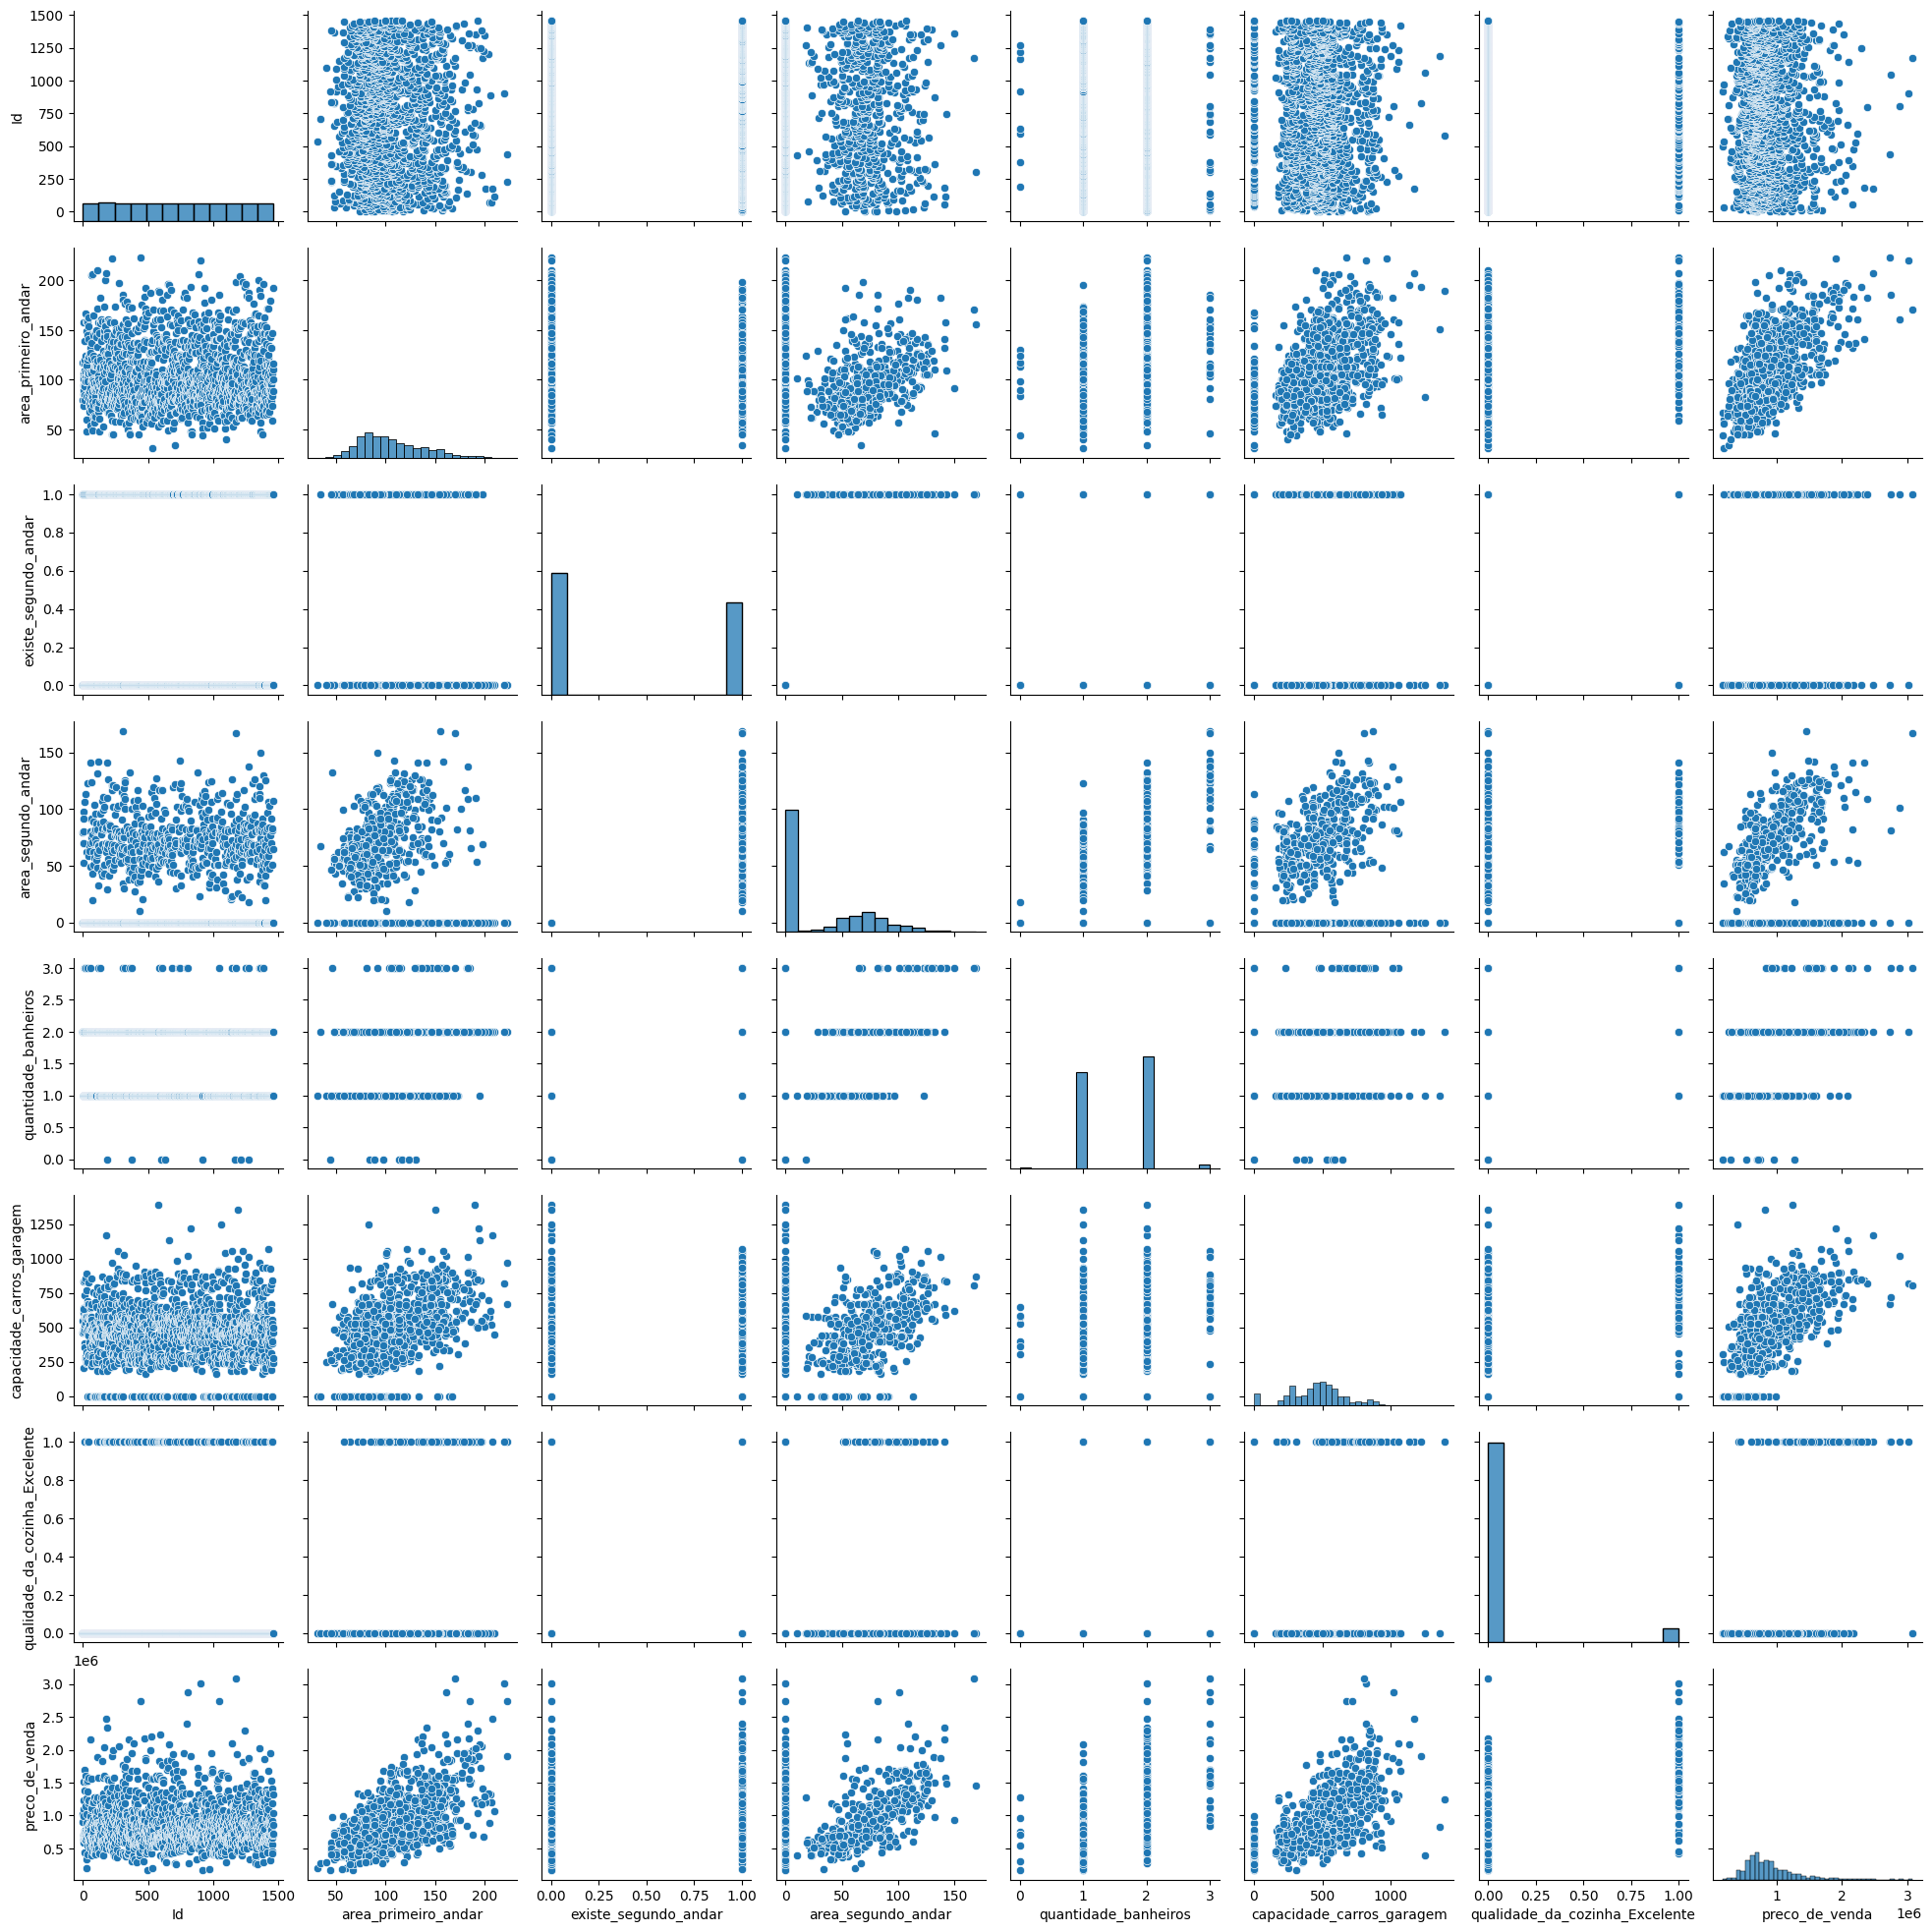

In [ ]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [ ]:
dados.columns

Index(['Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente',
       'preco_de_venda'],
      dtype='object')

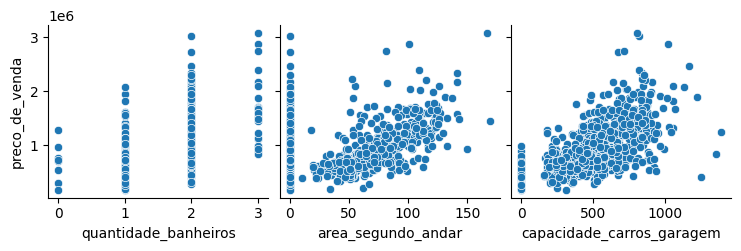

In [ ]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [ ]:
# importando a api do statsmodels
import statsmodels.api as sm

In [ ]:
# adicionando o constante
X_train = sm.add_constant(X_train)

In [ ]:
X_train.columns

Index(['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [ ]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(Y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.79e-289
Time:                        13:09:57   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.93e-264
Time:                        13:11:51   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.15e-227
Time:                        13:21:48   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Comparando modelos
Qual o melhor modelo?


In [ ]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7414024156090393
Modelo 2:  0.7081440416220739
Modelo 3:  0.6511289354898803


In [ ]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


In [ ]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

## Desafio

https://colab.research.google.com/drive/1rxYC-vpUrKtopd4M77psO5sCPhAVNRIC?usp=sharing

# 4. Precificando as casas

## Obtendo o R² da previsão

In [58]:
X_test.columns

Index(['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [59]:
modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [57]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [60]:
# Prevendo com o modelo 3
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente' ]])

In [61]:
# Qual o r² da previsão?
modelo_3.rsquared

0.6511289354898803

In [63]:
# Qual o R² do treino?
print("R²: ", r2_score(Y_test, predict_3))

R²:  0.6432078074497706


## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [64]:
#Novo imovel
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[120],
                            'existe_segundo_andar': [1],
                            'quantidade_banheiros': [2],
                            'qualidade_da_cozinha_Excelente': [0]
                            })

In [65]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

0    968146.285305
dtype: float64

In [66]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_3.predict(novo_imovel)[0])

1123758.2426020515


In [80]:
modelo_0.predict(imovel['area_primeiro_andar'])

0    818686.169194
dtype: float64

## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [74]:
# Lendo várias casas?
novas_casas = pd.read_csv('/content/Novas_casas.csv', sep=';')

In [75]:
novas_casas.head()

Casa  area_primeiro_andar  existe_segundo_andar  quantidade_banheiros  \
0     1                  150                     1                     2   
1     2                  180                     0                     3   
2     3                  120                     1                     2   
3     4                  200                     1                     3   
4     5                  160                     0                     2   

   qualidade_da_cozinha_Excelente  
0                               1  
1                               1  
2                               1  
3                               1  
4                               1

In [71]:
novas_casas.columns

Index(['Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda'], dtype='object')

In [76]:
novas_casas = novas_casas.drop(columns = 'Casa')

In [77]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)

In [78]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

0    1.751739e+06
1    1.863058e+06
2    1.568149e+06
3    2.206758e+06
4    1.591629e+06
5    1.246151e+06
6    1.357470e+06
7    1.552134e+06
8    9.636478e+05
9    1.639974e+06
dtype: float64

# MÃO NA MASSA: estimando o valor de uma casa

A casa possui:
* 1 banheiro
* Área 98m²
* Não contém segundo andar
* Qualidade da cozinha excelente
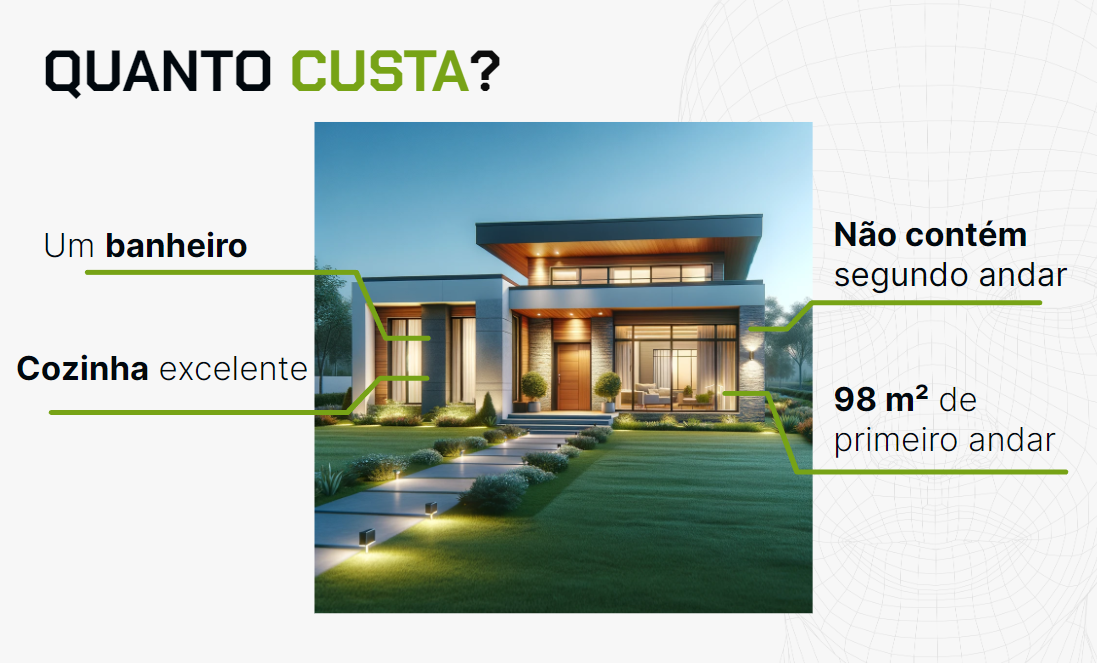

In [79]:
imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[98],
                            'existe_segundo_andar': [0],
                            'quantidade_banheiros': [1],
                            'qualidade_da_cozinha_Excelente': [1]
                            })

In [81]:
modelo_3.predict(imovel)[0]

1063173.8519646404

# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [82]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [85]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1

vif_1['vif'] = [ variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [86]:
vif_1

variavel        vif
0                           const  20.230833
1             area_primeiro_andar   2.193680
2            existe_segundo_andar   7.455059
3              area_segundo_andar   7.589396
4            quantidade_banheiros   1.720795
5       capacidade_carros_garagem   1.570078
6  qualidade_da_cozinha_Excelente   1.182606

In [87]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3

vif_3['vif'] = [ variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]

In [88]:
vif_3

variavel        vif
0                           const  18.773457
1             area_primeiro_andar   1.919046
2            existe_segundo_andar   1.644067
3            quantidade_banheiros   1.539255
4  qualidade_da_cozinha_Excelente   1.151795

## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [89]:
# Prevendo os valores do treino X_train[explicativas_3]
Y_previsto_train = modelo_3.predict(X_train[explicativas_3])

In [90]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x=Y_previsto_train, y= Y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [92]:
# Residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

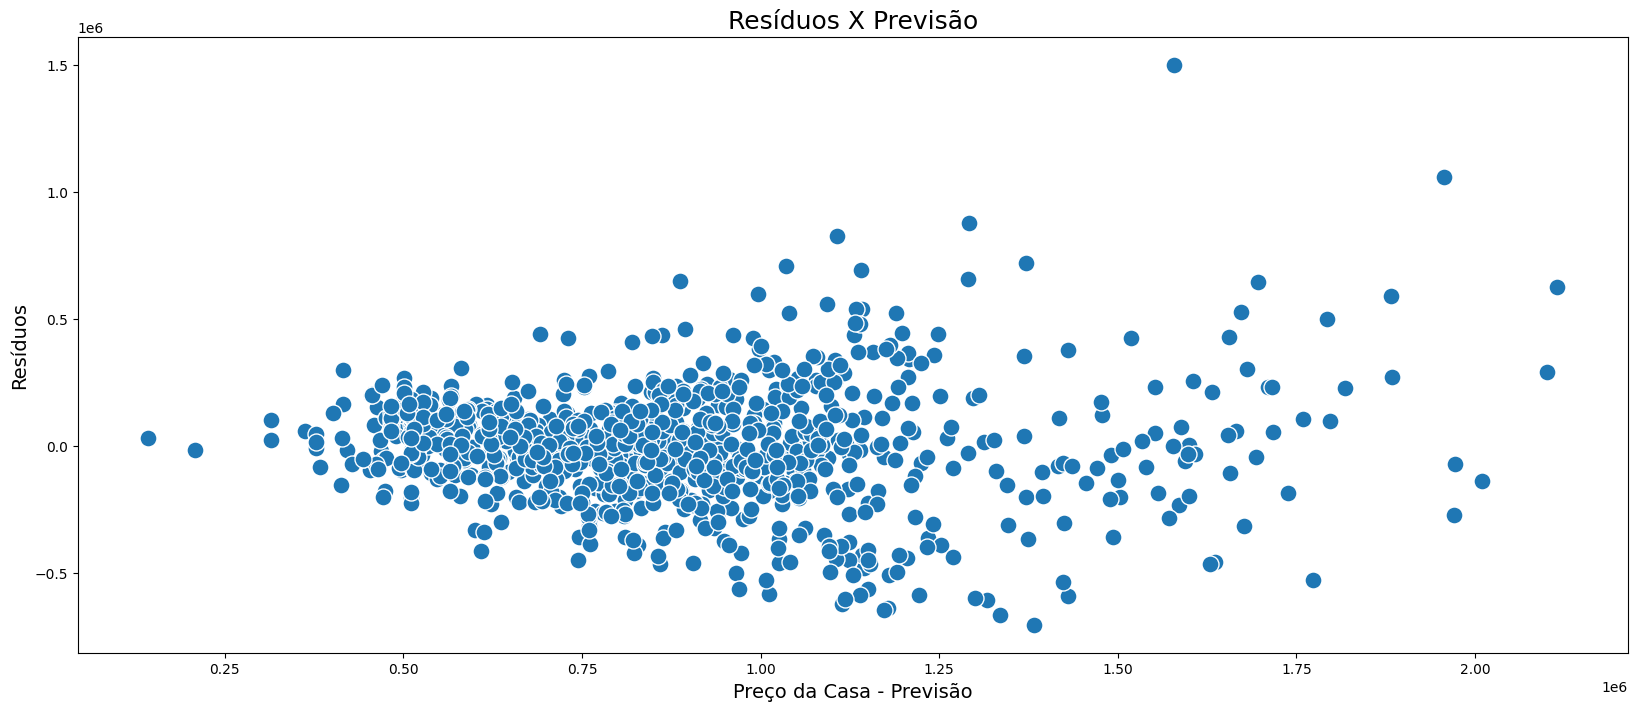

In [93]:
ax = sns.scatterplot(x=Y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

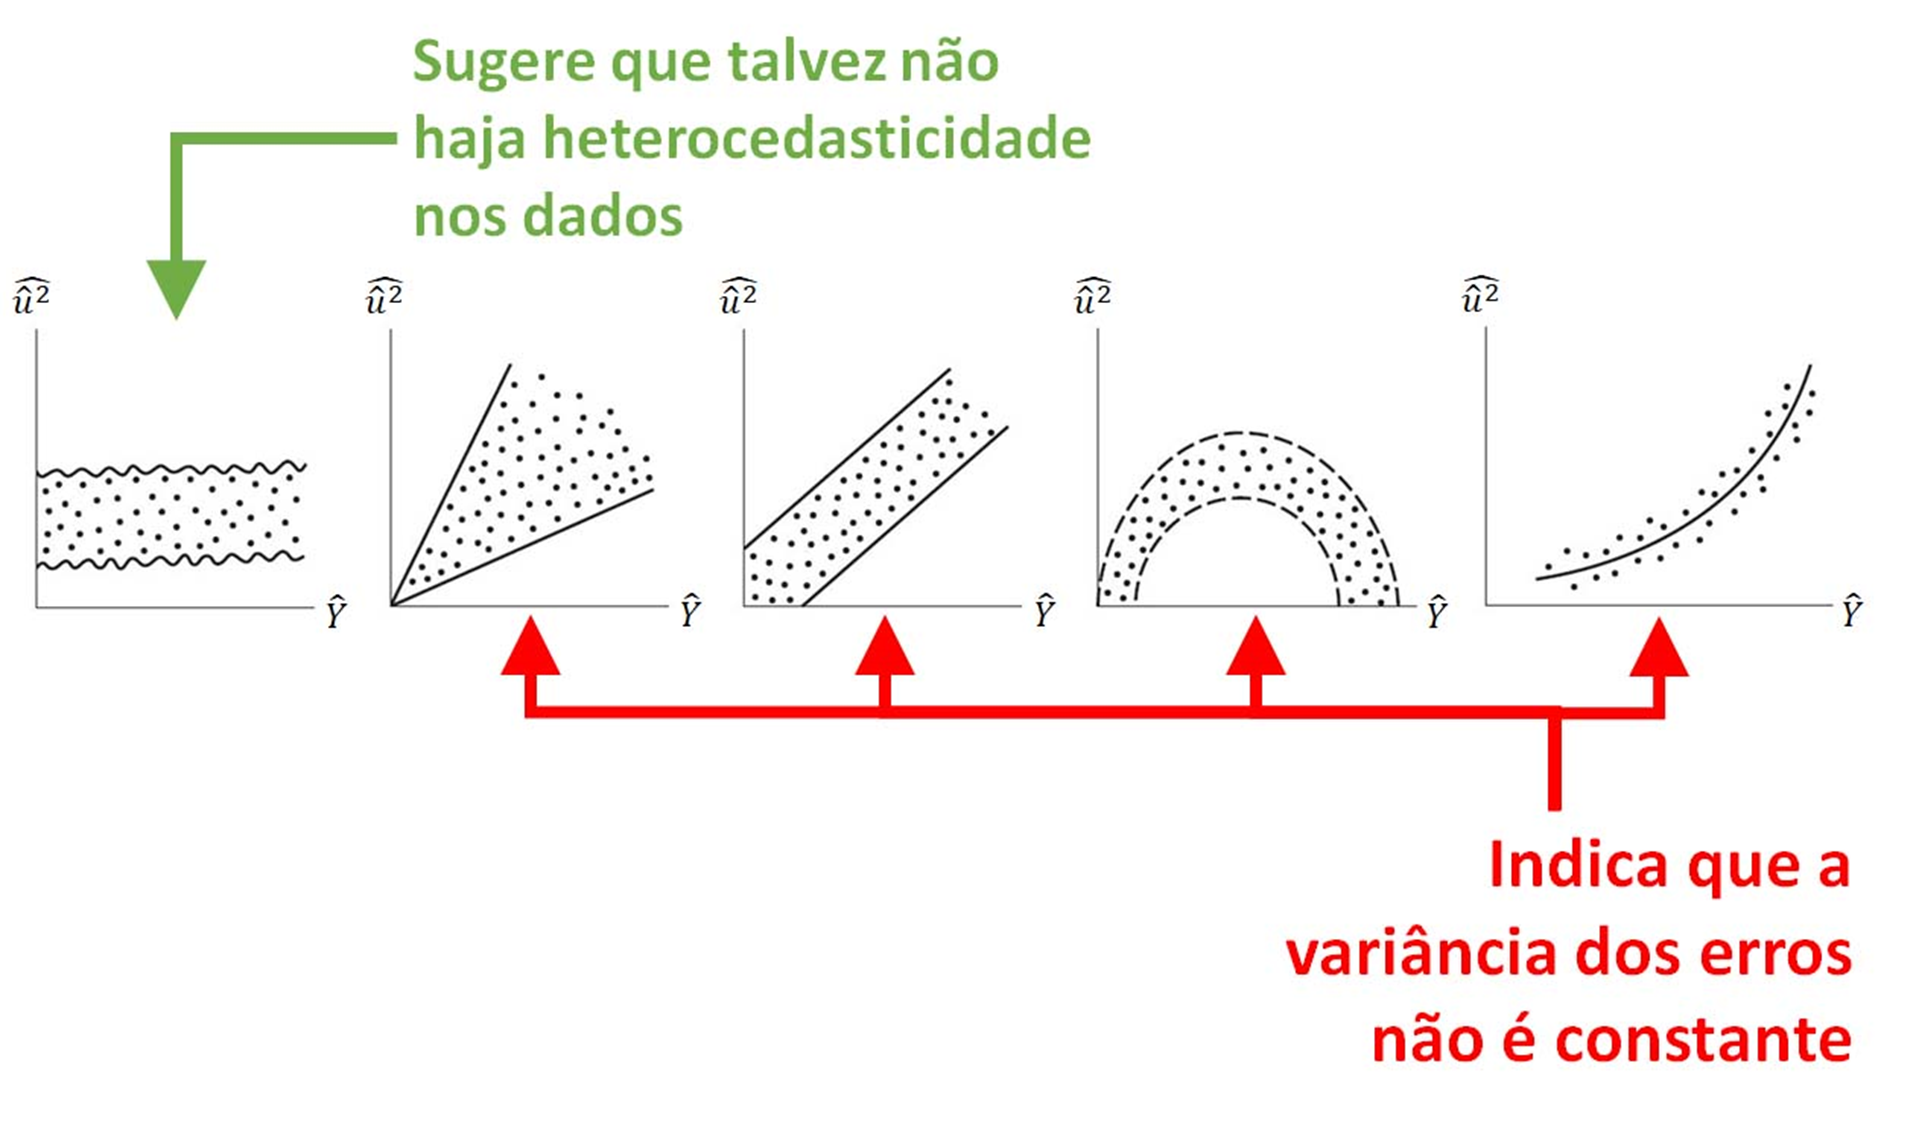

# Mão na massa

Primeira etapa: Verifique a multicolinearidade utilizando o conceito de VIF. Se houver indícios de multicolinearidade entre as variáveis, tente pensar em quais medidas podem ser tomadas. Para isso você deverá construir um modelo de regressão linear assumindo que a coluna PE é a variável y.

Segunda etapa: Realize uma análise de resíduos e identifique se há ou não heterocedasticidade nos dados.

https://colab.research.google.com/drive/1rcwVCiEPv5odMyhIoqrYNd2xRWO6_tME?usp=sharing

# PARA SABER MAIS


### estimação da regressão linear simples
A regressão linear foi a metodologia que ajustou a melhor reta que representa linearmente a interação entre X e Y; no nosso caso, o tamanho da área do primeiro andar e o preço de venda da casa.

Vale recapitular cada componente da regressão linear:

Função
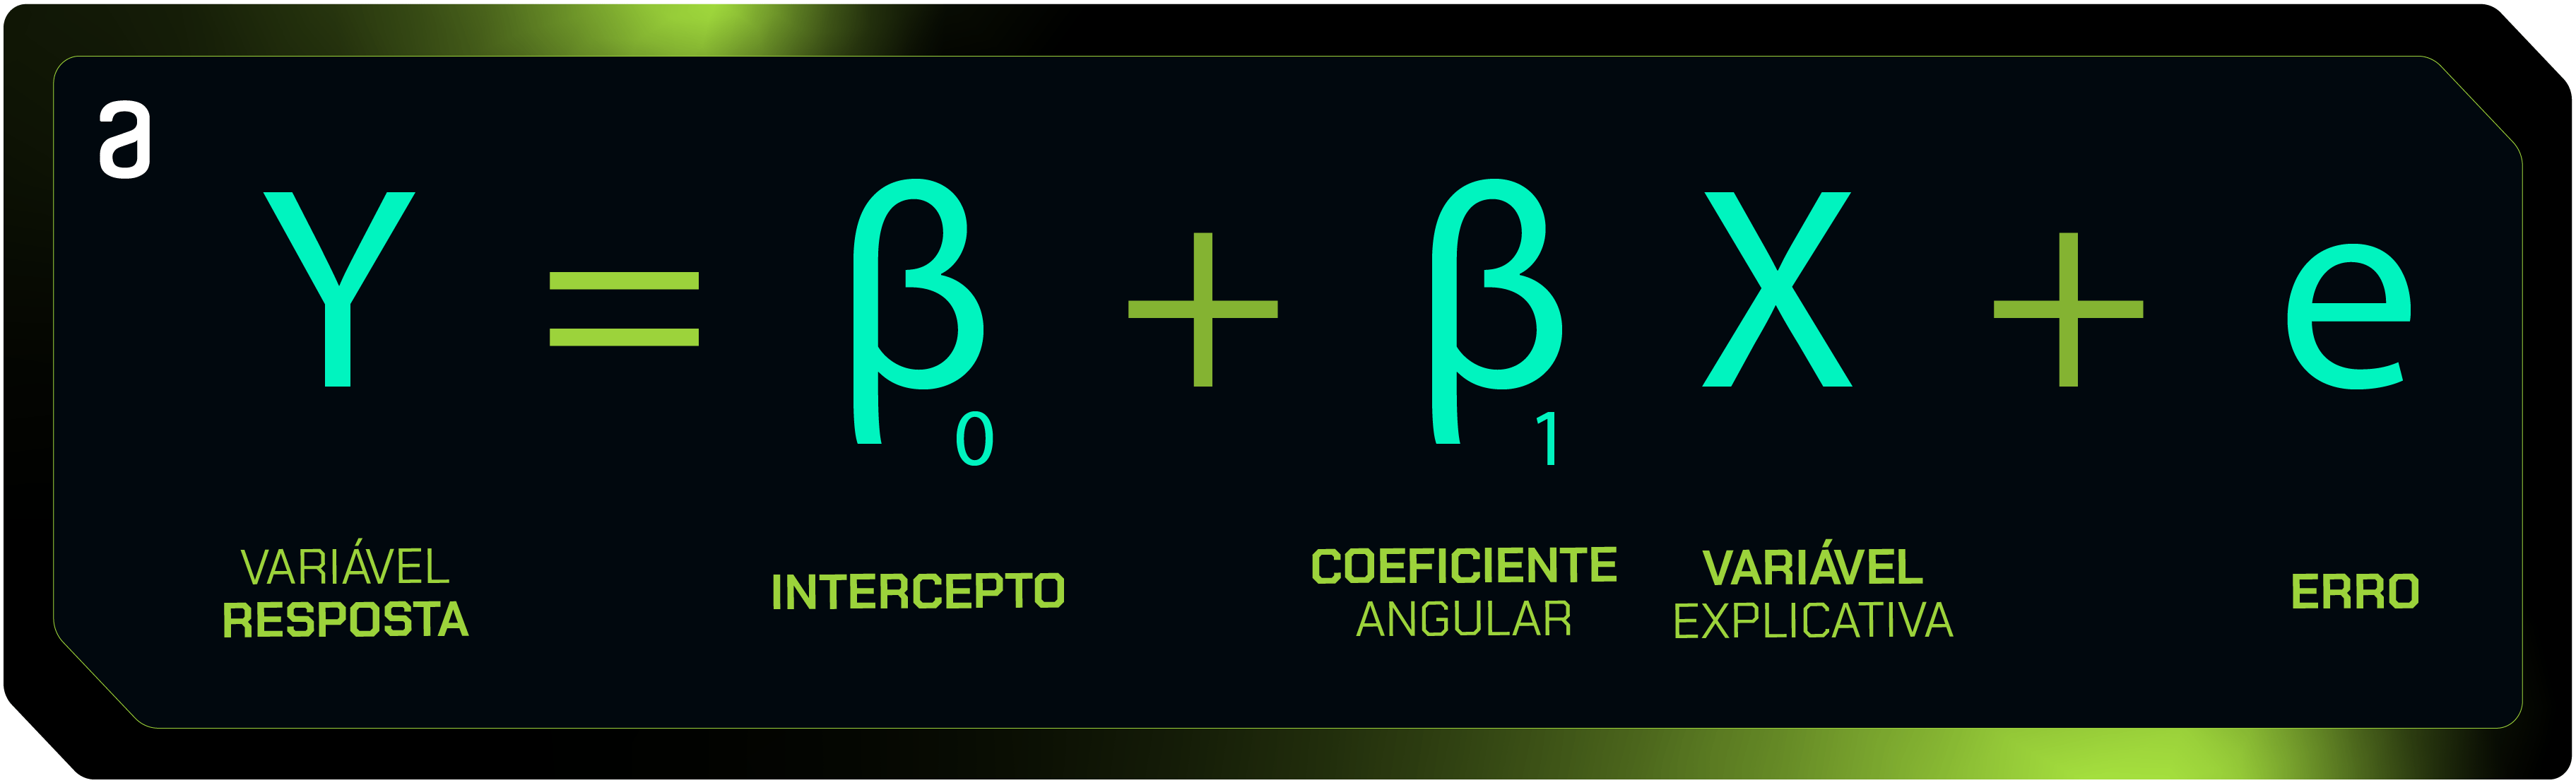  
1. Variável Resposta (Y): Também chamada de variável dependente é aquela que estamos tentando prever.
2. Intercepto (β₀): O ponto onde a linha de regressão intercepta o eixo vertical (Y), ou seja, o valor de Y quando X é igual a 0.
Variável Explicativa (X): Também chamada de variável independente e é o fator que usamos para prever e explicar a variável resposta.
3. Coeficientes de Regressão (β₁): Impacto de cada variável explicativa X na variável resposta, é o efeito de X em Y.
4. Erro Residual (e): Diferença entre os valores reais e previstos da variável resposta.  

Coeficientes
A relação linear entre as variáveis X e Y é representada graficamente por uma linha. Este processo de encontrar a linha ideal envolve minimizar a distância entre os pontos reais e a própria linha.

O ajuste da linha de regressão linear é simplificado pelo método dos mínimos quadrados. Este método visa encontrar a linha que melhor se ajusta aos dados observados, minimizando a soma dos quadrados das diferenças entre os valores reais e os valores previstos pela linha e calculando os coeficientes do modelo.  
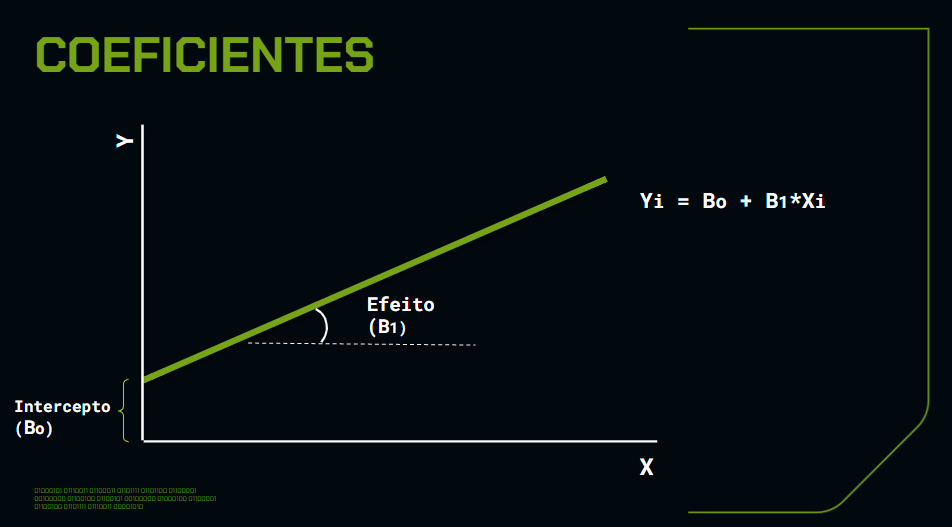

### explicabilidade
O coeficiente de determinação, frequentemente chamado de R², é uma medida estatística que indica o quanto a variabilidade da variável dependente (resposta) é explicada pelo modelo de regressão linear.

Interpretando o R²  
Ele varia de 0 a 1, um valor próximo de 1 indica que o modelo ajusta bem os dados, explicando a maioria da variação na variável dependente/resposta. Já um valor próximo de 0 indica que o modelo não consegue explicar muita variação na variável dependente/resposta.

Usando no teste  
Além disso, o R² pode ser usado para comparar o desempenho do modelo em diferentes conjuntos de dados, como treinamento e teste. Isso ajuda a identificar problemas de overfitting (ajuste excessivo) ou underfitting (ajuste insuficiente). Idealmente, desejamos que o R² seja consistente entre os conjuntos de treinamento e teste, indicando uma boa capacidade de generalização do modelo para novos dados.

Fórmula  
Uma das fórmulas do R² pode ser representada pela razão entre a variação explicada e pela variação total. Por isso que dizemos que quanto mais perto do 1 melhor é adequação do modelo, já que a variação explicada será mais próxima da variação total nessa razão.  
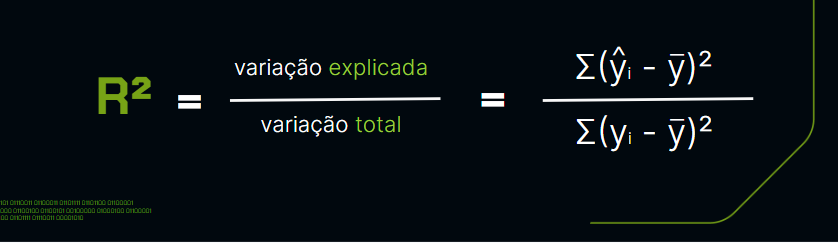




### refinando a seleção de modelos

Existem métodos automáticos de seleção de variáveis que podem ser extremamente úteis em situações onde o número de variáveis explicativas é grande. Esses métodos, como stepwise, backward e forward selection, seguem critérios pré-definidos para adicionar ou remover variáveis do modelo de forma iterativa. Explore a seguir os métodos automáticos de seleção de variáveis, que visam equilibrar a complexidade do modelo e sua capacidade explicativa.

* O método forward selection começa com um modelo sem variáveis explicativas e adiciona uma a uma, escolhendo em cada passo a variável que mais melhora o modelo de acordo com um critério estatístico específico, como o menor valor de p-valor ou o maior aumento no R² ajustado.
* O backward selection inicia com todas as variáveis possíveis no modelo e, iterativamente, remove a variável que menos contribui para o modelo, novamente baseando-se em critérios como o p-valor ou o impacto no R² ajustado.
* O stepwise selection é uma combinação dos dois métodos anteriores, onde as variáveis podem ser adicionadas ou removidas em cada passo, dependendo de sua contribuição para o melhoramento do modelo.  
Esses métodos de seleção automática são ferramentas poderosas que ajudam na identificação do modelo mais parcimonioso, ou seja, aquele que consegue explicar os dados de maneira eficiente sem ser excessivamente complexo. Contudo, é crucial que o cientista de dados compreenda e supervisione o processo, pois a escolha automática pode, às vezes, introduzir viés ou sobreajuste, especialmente se o critério de seleção não for bem escolhido ou se o modelo não for validado adequadamente com dados novos ou de teste.

### salvando o modelo em um arquivo

Ao desenvolver modelos de regressão com Statsmodels, é comum querer salvar esses modelos para uso futuro, seja para implantação em produção, compartilhamento com outros membros da equipe ou simplesmente para backup. Uma maneira conveniente de fazer isso em Python é usando a biblioteca pickle, que permite serializar objetos Python em arquivos e desserializá-los de volta para objetos Python. Essa biblioteca não precisa ser instalada, uma vez que já vem por padrão no Python.

Vamos explorar como salvar um modelo de regressão linear do Statsmodels com a biblioteca pickle e depois como fazer a leitura do arquivo.

Como salvar o Modelo com Pickle
Após treinar o modelo, podemos salvá-lo em um arquivo usando a biblioteca pickle. Para isso, é necessário importar a biblioteca e depois podemos usar a função pickle.dump(), informando o modelo e o arquivo como parâmetros.



```
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo, arquivo)
```

Carregar o Modelo de volta com Pickle
Depois de salvar o modelo, podemos carregá-lo de volta para uso posterior. Para fazer isso, basta usar o método pickle.load()[texto do link](https://docs.python.org/3/library/pickle.html#pickle.load) utilizando o arquivo como parâmetro da função.

```
# Carregar o modelo de volta do arquivo
with open(nome_arquivo, 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)
```
A partir da leitura do arquivo, é possível utilizar o modelo para fazer previsões e checar métricas da mesma forma que usamos o modelo original.

### entendendo a heterocedasticidade

Quando mergulhamos no universo da análise de dados, um conceito fundamental que frequentemente encontramos é a regressão linear. Essa técnica nos permite entender relações e prever tendências baseando-se em dados existentes. Contudo, ao aplicar a regressão linear, é crucial estar atento à heterocedasticidade, uma característica que pode afetar significativamente a interpretação dos resultados.

O Que é Heterocedasticidade?  
Heterocedasticidade é um termo utilizado em estatística para descrever uma situação em que a variância dos erros (ou resíduos) de um modelo de regressão, não é constante ao longo do intervalo de valores previstos. Em termos simples, se a dispersão dos resíduos varia em diferentes níveis do preditor, estamos diante da heterocedasticidade. Isso é um problema porque a maioria dos métodos de regressão linear pressupõe homocedasticidade, ou seja, que os resíduos têm variância constante em todos os níveis dos preditores.  

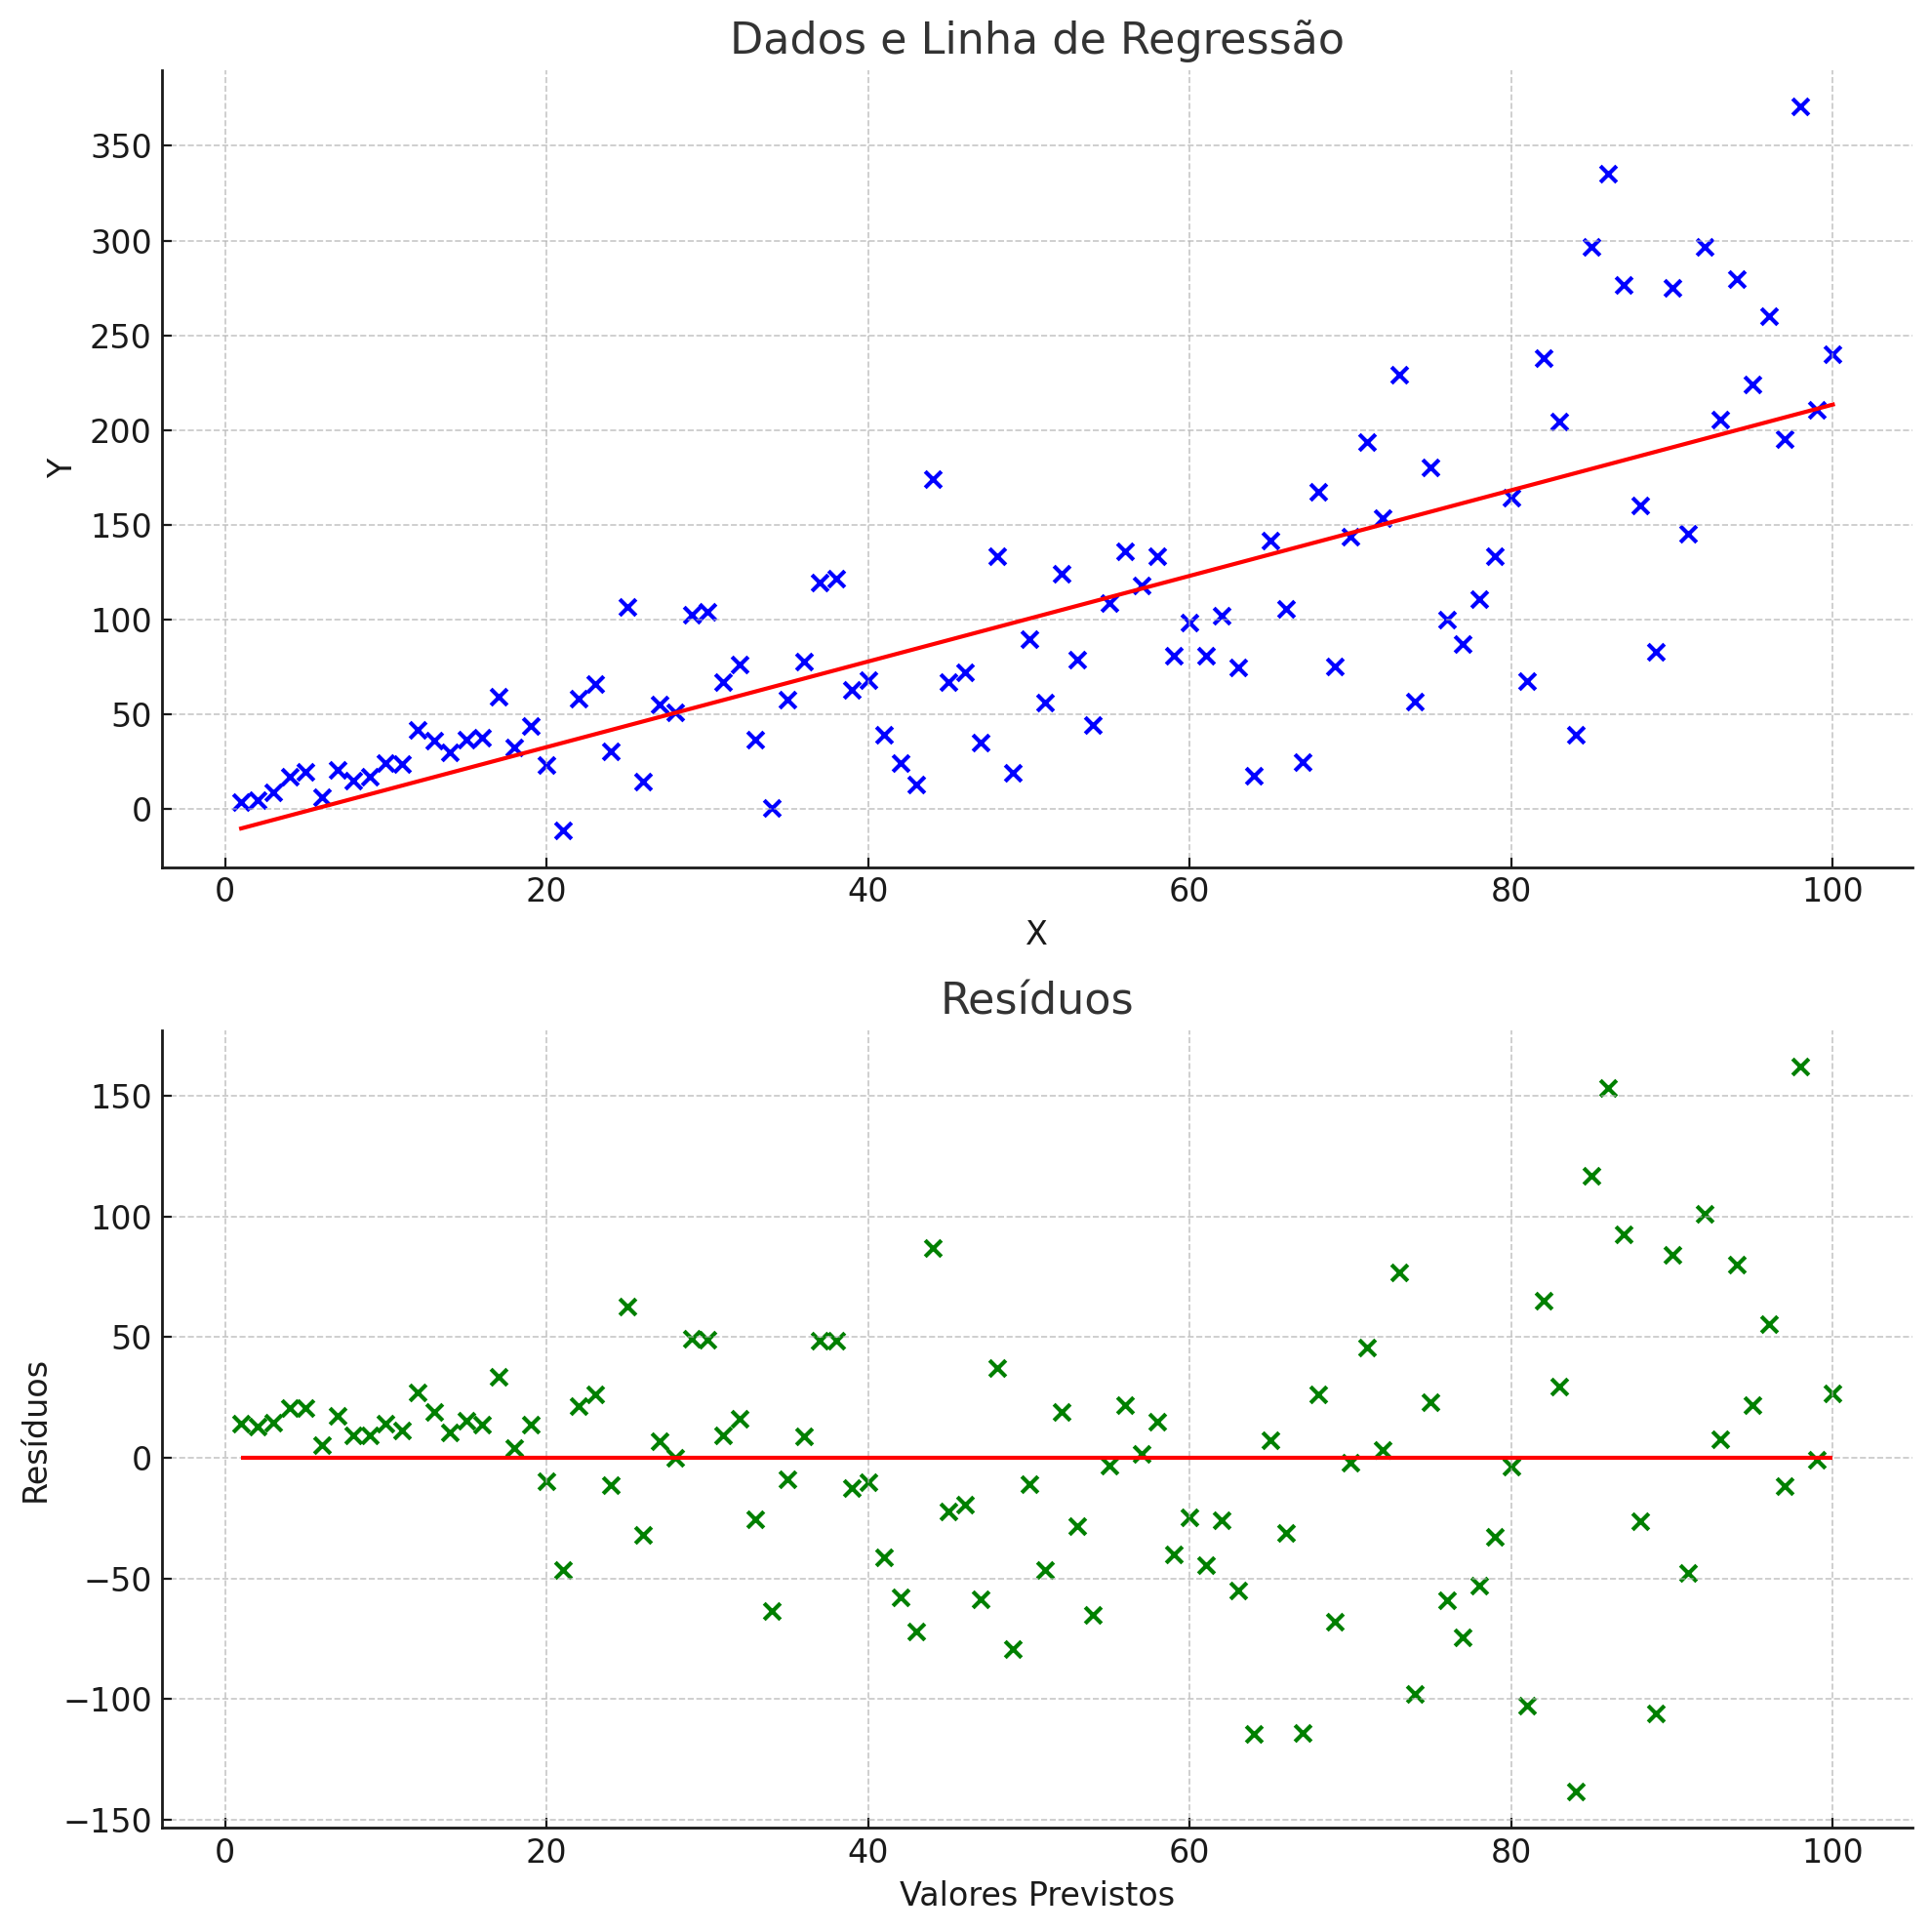

Por que a Heterocedasticidade é um Problema?  
A presença de heterocedasticidade pode levar a estimativas de coeficientes ineficientes e a testes de hipóteses inválidos, comprometendo a confiabilidade das inferências estatísticas. Embora não afete a imparcialidade ou a consistência dos estimadores de mínimos quadrados ordinários, ela impacta na eficiência desses estimadores, tornando-os menos confiáveis.

Identificando Heterocedasticidade  
Um dos métodos mais comuns para detectar a heterocedasticidade é através da análise visual dos resíduos. Após ajustar um modelo de regressão linear, podemos plotar os resíduos em função dos valores previstos. Se os resíduos se espalharem de maneira uniforme, sem formar padrões ou funis, o modelo provavelmente apresenta homocedasticidade. Por outro lado, se a dispersão dos resíduos aumentar ou diminuir com os valores previstos, isso indica heterocedasticidade.

Como Avaliar a Heterocedasticidade?  
Além de uma análise visual dos resíduos, existem vários testes estatísticos para avaliar formalmente a presença de heterocedasticidade, como o teste de White e o teste de Breusch-Pagan. Estes testes ajudam a quantificar se a variância dos resíduos está relacionada com os valores previstos, fornecendo uma base mais sólida para decidir se a heterocedasticidade é uma preocupação significativa no modelo.

Tratando a Heterocedasticidade  
Se identificarmos heterocedasticidade, várias abordagens podem ser adotadas para lidar com o problema, como transformação de variáveis (por exemplo, logarítmica ou raiz quadrada) ou o uso de técnicas de regressão robustas, que são menos sensíveis à variância dos resíduos.

Conclusão  
Ao compreender e identificar a heterocedasticidade, podemos tomar medidas apropriadas para garantir que nossas análises de regressão linear sejam confiáveis e válidas. Esse cuidado nos permite fazer inferências mais precisas e fundamentadas, essenciais para a tomada de decisões baseadas em dados.



# REFERENCIAS
https://www.statsmodels.org/stable/regression.html  

https://www.esalq.usp.br/biblioteca/sites/default/files/Analise_Regress%C3%A3o.pdf  

https://www.google.com.br/books/edition/Guia_Mang%C3%A1_An%C3%A1lise_de_Regress%C3%A3o/QWCHDwAAQBAJ?hl=pt-BR&gbpv=0